# Reciprocal pairs for neurons with an identified soma in the volume
Analysis of 1998/2 = 999 pairs of neurons in the Layer 2/3 volume that form at least one synapse up the other, and vice versa  
A special thanks to Wanwen Zeng at Stanford for generating the reciprocal pairs library file

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import scipy as stats

In [2]:
# This dataframe was generated by taking the paired.csv table and merging with the cell subtypes table
# I'm sure this could have been done in pandas, but I found it more expedient for my own skill set to do it in Excel...
# The vascular, glia and unidentied (na) cellids were removed leaving only neurons with an identified subtype in the table

npairs = pd.read_csv("pairs_rm_v_g_na.csv")
npairs

,id,pre_root_id,post_root_id,cleft_vx,ctr_pt_x_nm,ctr_pt_y_nm,ctr_pt_z_nm,pre_pos_x_vx,pre_pos_y_vx,pre_pos_z_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,post_pos_x_vx,post_pos_y_vx,post_pos_z_vx,pre_cell_type,pre_cell_subtype,post_cell_type,post_cell_subtype
0,1165778,648518346349538791,648518346349539846,176,220088,234728,78040,54998,58636,1950,55022,58682,1951,55032,58738,1950,inhibitory,basket,inhibitory,basket
1,1936905,648518346349539846,648518346349538791,182,268032,277376,12200,67022,69334,308,67008,69344,305,66948,69362,307,inhibitory,basket,inhibitory,basket
2,1936905,648518346349539846,648518346349538791,182,268032,277376,12200,67022,69334,308,67008,69344,305,66948,69362,307,inhibitory,basket,inhibitory,basket
3,1165778,648518346349538791,648518346349539846,176,220088,234728,78040,54998,58636,1950,55022,58682,1951,55032,58738,1950,inhibitory,basket,inhibitory,basket
4,2050497,648518346349538791,648518346349539846,361,248016,203400,26320,61944,50836,659,62004,50850,658,62026,50904,659,inhibitory,basket,inhibitory,basket
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2918993,648518346349539486,648518346349525188,726,393620,255804,25560,98388,64028,639,98405,63951,639,98326,63986,639,pyramidal,pyramidal cell,inhibitory,unknown_type
1994,2918993,648518346349539486,648518346349525188,726,393620,255804,25560,98388,64028,639,98405,63951,639,98326,63986,639,pyramidal,pyramidal cell,inhibitory,unknown_type
1995,2876732,648518346349539414,648518346349488919,176,417832,256240,15200,104402,64090,381,104458,64060,380,104428,63996,381,pyramidal,pyramidal cell,inhibitory,unknown_type
1996,2876732,648518346349539414,648518346349488919,176,417832,256240,15200,104402,64090,381,104458,64060,380,104428,63996,381,pyramidal,pyramidal cell,inhibitory,unknown_type


In [3]:
npairs["pre_root_id"].value_counts()

648518346349528994    275
648518346349539215    248
648518346349539846    191
648518346349538179    117
648518346349538791     39
                     ... 
648518346349539471      2
648518346349538298      2
648518346349538462      2
648518346349531254      2
648518346349530766      2
Name: pre_root_id, Length: 139, dtype: int64

# Max number of reciprocal pairs is cell id 648518346349528994

In [4]:
npairs_pre_max = npairs[npairs["pre_root_id"] == 648518346349528994]
npairs_pre_max.sort_values("post_root_id")

,id,pre_root_id,post_root_id,cleft_vx,ctr_pt_x_nm,ctr_pt_y_nm,ctr_pt_z_nm,pre_pos_x_vx,pre_pos_y_vx,pre_pos_z_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,post_pos_x_vx,post_pos_y_vx,post_pos_z_vx,pre_cell_type,pre_cell_subtype,post_cell_type,post_cell_subtype
678,1465050,648518346349528994,648518346349524971,1234,330156,184448,68480,82468,46162,1712,82539,46112,1712,82452,46060,1712,inhibitory,basket,pyramidal,pyramidal cell
668,3148686,648518346349528994,648518346349524971,197,336192,175840,64560,84048,43950,1612,84048,43960,1614,83962,44004,1612,inhibitory,basket,pyramidal,pyramidal cell
665,1465050,648518346349528994,648518346349524971,1234,330156,184448,68480,82468,46162,1712,82539,46112,1712,82452,46060,1712,inhibitory,basket,pyramidal,pyramidal cell
666,1761241,648518346349528994,648518346349524971,648,330344,184584,67120,82520,46214,1669,82586,46146,1678,82480,46120,1669,inhibitory,basket,pyramidal,pyramidal cell
667,3043302,648518346349528994,648518346349524971,249,335492,174148,64520,83832,43508,1608,83873,43537,1613,83742,43504,1608,inhibitory,basket,pyramidal,pyramidal cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,3164858,648518346349528994,648518346349540048,268,355552,177464,14160,88818,44370,357,88888,44366,354,88904,44326,357,inhibitory,basket,pyramidal,pyramidal cell
749,353877,648518346349528994,648518346349540048,91,341336,161464,15400,85350,40394,389,85334,40366,385,85444,40352,387,inhibitory,basket,pyramidal,pyramidal cell
189,353877,648518346349528994,648518346349540048,91,341336,161464,15400,85350,40394,389,85334,40366,385,85444,40352,387,inhibitory,basket,pyramidal,pyramidal cell
747,519782,648518346349528994,648518346349540057,188,411368,187568,36400,102748,46980,909,102842,46892,910,102828,47052,909,inhibitory,basket,pyramidal,pyramidal cell


In [5]:
# This cell id is an inhibitory basket neuron

npairs_pre_max["pre_cell_subtype"].iloc[0]

'basket'

In [6]:
# This basket neuron makes 275 reciprocal synapses 
len(npairs_pre_max)

275

In [7]:
npairs_pre_max["post_root_id"].value_counts()

648518346349538192    20
648518346349539539    18
648518346349539215    14
648518346349537840    14
648518346349539560    13
648518346349539486    13
648518346349539864    12
648518346349538478    11
648518346349538056    10
648518346349539853    10
648518346349538250    10
648518346349537160     9
648518346349537913     8
648518346349536680     8
648518346349538787     7
648518346349536679     7
648518346349537153     7
648518346349537978     6
648518346349538440     6
648518346349539789     6
648518346349539886     5
648518346349524971     5
648518346349539653     5
648518346349538053     5
648518346349538421     4
648518346349537716     4
648518346349539423     4
648518346349540048     4
648518346349537818     4
648518346349533227     3
648518346349537400     3
648518346349539895     3
648518346349539333     3
648518346349537081     2
648518346349538791     2
648518346349540057     2
648518346349533058     2
648518346349534289     2
648518346349535192     2
648518346349528994     2


In [8]:
# These 275 reciprocal synapses are with 40 other neurons in the volume

len(npairs_pre_max["post_root_id"].value_counts())

40

<AxesSubplot:>

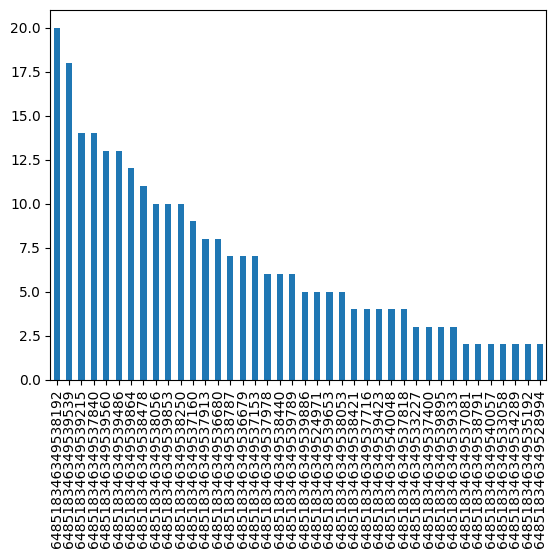

In [9]:
# bar graph of the neurons in the volume with reciprocal synapses with cell id 648518346349528994
npairs_pre_max["post_root_id"].value_counts().plot.bar()

## View cellid 648518346349528994 and 648518346349538192 in [neuroglancer](https://neuromancer-seung-import.appspot.com/#!%7B%22layers%22:%5B%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v0/son_of_alignment_v15_rechunked%22%2C%22type%22:%22image%22%2C%22blend%22:%22default%22%2C%22shaderControls%22:%7B%7D%2C%22name%22:%22EM%22%7D%2C%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v185/seg%22%2C%22type%22:%22segmentation%22%2C%22selectedAlpha%22:0.51%2C%22objectAlpha%22:0.75%2C%22hideSegmentZero%22:false%2C%22segments%22:%5B%22648518346349528994%22%2C%22648518346349538192%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22cell_segmentation_v185%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-clefts/mip1_d2_1175k%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22synapses%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-mito/seg_191220%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22mitochondria%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-nuclei/seg%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22nuclei%22%7D%5D%2C%22navigation%22:%7B%22pose%22:%7B%22position%22:%7B%22voxelSize%22:%5B4%2C4%2C40%5D%2C%22voxelCoordinates%22:%5B84591.8046875%2C57988.25%2C901.4423828125%5D%7D%7D%2C%22zoomFactor%22:383.0066650796121%7D%2C%22showAxisLines%22:false%2C%22perspectiveOrientation%22:%5B0.0060220337472856045%2C-0.9957989454269409%2C-0.05526130273938179%2C-0.07276246696710587%5D%2C%22perspectiveZoom%22:1888.3060096165884%2C%22showSlices%22:false%2C%22selectedLayer%22:%7B%22layer%22:%22cell_segmentation_v185%22%2C%22visible%22:true%7D%2C%22layout%22:%7B%22type%22:%223d%22%2C%22orthographicProjection%22:true%7D%7D)

In [10]:
# This neuron even has an autapse!

In [11]:
npairs_pre_max_self = npairs_pre_max["post_root_id"] == 648518346349528994
npairs_pre_max_selfdf = npairs_pre_max.loc[npairs_pre_max_self, ["id", "ctr_pos_x_vx", "ctr_pos_y_vx", "ctr_pos_z_vx"]]
npairs_pre_max_selfdf

,id,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx
68,2509235,83186,55184,1047
69,2509235,83186,55184,1047


## See in [neuroglancer](https://neuromancer-seung-import.appspot.com/#!%7B%22layers%22:%5B%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v0/son_of_alignment_v15_rechunked%22%2C%22type%22:%22image%22%2C%22blend%22:%22default%22%2C%22shaderControls%22:%7B%7D%2C%22name%22:%22EM%22%7D%2C%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v185/seg%22%2C%22type%22:%22segmentation%22%2C%22selectedAlpha%22:0.51%2C%22segments%22:%5B%22648518346349528994%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22cell_segmentation_v185%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-clefts/mip1_d2_1175k%22%2C%22type%22:%22segmentation%22%2C%22segmentColors%22:%7B%223623767%22:%22#5c61ff%22%7D%2C%22segments%22:%5B%222509235%22%2C%223623767%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22synapses%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-mito/seg_191220%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22mitochondria%22%2C%22visible%22:false%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-nuclei/seg%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22nuclei%22%7D%5D%2C%22navigation%22:%7B%22pose%22:%7B%22position%22:%7B%22voxelSize%22:%5B4%2C4%2C40%5D%2C%22voxelCoordinates%22:%5B83186%2C55184%2C1046%5D%7D%7D%2C%22zoomFactor%22:5.984479141868939%7D%2C%22perspectiveOrientation%22:%5B0.19795255362987518%2C0.8017028570175171%2C0.033653996884822845%2C0.5629872679710388%5D%2C%22perspectiveZoom%22:113.08643733910445%2C%22showSlices%22:false%2C%22selectedLayer%22:%7B%22layer%22:%22cell_segmentation_v185%22%2C%22visible%22:true%7D%2C%22layout%22:%7B%22type%22:%22xy-3d%22%2C%22orthographicProjection%22:true%7D%7D)

## View the `reciprocal_pairs_synapse_visualizer.ipynb` for 2D and 3D visualizations

# Second highest number of reciprocal pairs 

In [12]:
npairs_pre_2ndmost = npairs[npairs["pre_root_id"] == 648518346349539215]
npairs_pre_2ndmost.sort_values("post_root_id")

,id,pre_root_id,post_root_id,cleft_vx,ctr_pt_x_nm,ctr_pt_y_nm,ctr_pt_z_nm,pre_pos_x_vx,pre_pos_y_vx,pre_pos_z_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,post_pos_x_vx,post_pos_y_vx,post_pos_z_vx,pre_cell_type,pre_cell_subtype,post_cell_type,post_cell_subtype
400,1984844,648518346349539215,648518346349492682,337,433704,167568,84280,108362,41914,2106,108426,41892,2107,108456,41900,2106,inhibitory,basket,pyramidal,pyramidal cell
540,1984844,648518346349539215,648518346349492682,337,433704,167568,84280,108362,41914,2106,108426,41892,2107,108456,41900,2106,inhibitory,basket,pyramidal,pyramidal cell
389,1570738,648518346349539215,648518346349519354,335,374596,175056,62400,93620,43626,1564,93649,43764,1560,93564,43630,1563,inhibitory,basket,pyramidal,pyramidal cell
448,583573,648518346349539215,648518346349519354,112,399536,207544,55920,99832,51908,1397,99884,51886,1398,99922,51896,1397,inhibitory,basket,pyramidal,pyramidal cell
446,2357175,648518346349539215,648518346349519354,524,397544,209184,56480,99412,52234,1412,99386,52296,1412,99308,52260,1412,inhibitory,basket,pyramidal,pyramidal cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,3500013,648518346349539215,648518346349540017,346,403468,187684,55040,100854,46924,1379,100867,46921,1376,100820,46830,1378,inhibitory,basket,pyramidal,pyramidal cell
521,2200848,648518346349539215,648518346349540017,223,407672,187692,52040,101962,46964,1305,101918,46923,1301,101862,46992,1305,inhibitory,basket,pyramidal,pyramidal cell
522,2353473,648518346349539215,648518346349540017,519,403888,182760,61360,100970,45614,1534,100972,45690,1534,100894,45662,1534,inhibitory,basket,pyramidal,pyramidal cell
759,3500013,648518346349539215,648518346349540017,346,403468,187684,55040,100854,46924,1379,100867,46921,1376,100820,46830,1378,inhibitory,basket,pyramidal,pyramidal cell


In [13]:
# This cell id is also an inhibitory basket neuron

npairs_pre_2ndmost["pre_cell_subtype"].iloc[0]

'basket'

In [14]:
# This basket neuron makes 248 reciprocal synapses 
len(npairs_pre_2ndmost)

248

In [15]:
npairs_pre_2ndmost["post_root_id"].value_counts()

648518346349539464    17
648518346349519354    14
648518346349528994    14
648518346349538410    14
648518346349537913    13
648518346349538527    12
648518346349539789    11
648518346349537840     9
648518346349539653     8
648518346349539599     8
648518346349539846     7
648518346349540017     7
648518346349539845     7
648518346349537978     7
648518346349524971     7
648518346349538791     6
648518346349539864     6
648518346349539853     6
648518346349539486     6
648518346349538478     5
648518346349532006     5
648518346349539539     5
648518346349534855     4
648518346349539423     4
648518346349539825     4
648518346349537153     4
648518346349539071     4
648518346349538711     4
648518346349538387     4
648518346349534794     3
648518346349538056     3
648518346349539809     3
648518346349539884     3
648518346349536680     2
648518346349539575     2
648518346349492682     2
648518346349537848     2
648518346349538787     2
648518346349537487     2
648518346349536988     2


In [16]:
# These 248 reciprocal synapses are with 40 other neurons in the volume

len(npairs_pre_2ndmost["post_root_id"].value_counts())

40

<AxesSubplot:>

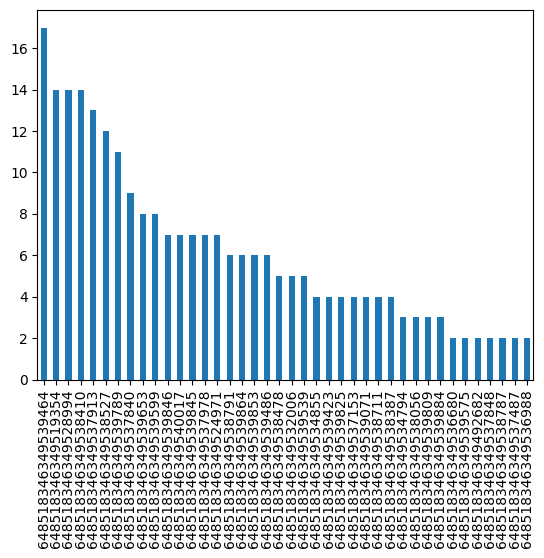

In [17]:
npairs_pre_2ndmost["post_root_id"].value_counts().plot.bar()

# View cell id 648518346349539215 and 648518346349539464 in [neuroglancer](https://neuromancer-seung-import.appspot.com/#!%7B%22layers%22:%5B%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v0/son_of_alignment_v15_rechunked%22%2C%22type%22:%22image%22%2C%22blend%22:%22default%22%2C%22shaderControls%22:%7B%7D%2C%22name%22:%22EM%22%7D%2C%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v185/seg%22%2C%22type%22:%22segmentation%22%2C%22selectedAlpha%22:0.51%2C%22segments%22:%5B%22648518346349539215%22%2C%22648518346349539464%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22cell_segmentation_v185%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-clefts/mip1_d2_1175k%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22synapses%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-mito/seg_191220%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22mitochondria%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-nuclei/seg%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22nuclei%22%7D%5D%2C%22navigation%22:%7B%22pose%22:%7B%22position%22:%7B%22voxelSize%22:%5B4%2C4%2C40%5D%2C%22voxelCoordinates%22:%5B82087.2421875%2C57552.1484375%2C831.6463623046875%5D%7D%7D%2C%22zoomFactor%22:383.0066650796121%7D%2C%22perspectiveOrientation%22:%5B-0.00825042650103569%2C0.06130112707614899%2C-0.0012821174459531903%2C0.9980843663215637%5D%2C%22perspectiveZoom%22:1913.7568983317922%2C%22showSlices%22:false%2C%22selectedLayer%22:%7B%22layer%22:%22cell_segmentation_v185%22%2C%22visible%22:true%7D%2C%22layout%22:%7B%22type%22:%223d%22%2C%22orthographicProjection%22:true%7D%7D)

In [18]:
# are there any autapses? No, there aren't any.

npairs_autapse_checker = npairs_pre_2ndmost["post_root_id"] == 648518346349539215
npairs_pre_2ndmost_selfdf = npairs_pre_2ndmost.loc[npairs_autapse_checker, ["id", "ctr_pos_x_vx", "ctr_pos_y_vx", "ctr_pos_z_vx"]]
npairs_pre_2ndmost_selfdf

,id,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx


# Third highest number of reciprocal pairs

In [19]:
npairs_pre_3rdmost = npairs[npairs["pre_root_id"] == 648518346349539846]
npairs_pre_3rdmost.sort_values("post_root_id")

,id,pre_root_id,post_root_id,cleft_vx,ctr_pt_x_nm,ctr_pt_y_nm,ctr_pt_z_nm,pre_pos_x_vx,pre_pos_y_vx,pre_pos_z_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,post_pos_x_vx,post_pos_y_vx,post_pos_z_vx,pre_cell_type,pre_cell_subtype,post_cell_type,post_cell_subtype
414,36404,648518346349539846,648518346349524141,64,216488,196984,66600,54170,49244,1666,54122,49246,1665,54078,49218,1666,inhibitory,basket,pyramidal,pyramidal cell
550,36404,648518346349539846,648518346349524141,64,216488,196984,66600,54170,49244,1666,54122,49246,1665,54078,49218,1666,inhibitory,basket,pyramidal,pyramidal cell
487,3382872,648518346349539846,648518346349533058,103,257372,214328,34400,64332,53632,861,64343,53582,860,64330,53564,859,inhibitory,basket,pyramidal,pyramidal cell
546,1010800,648518346349539846,648518346349533058,474,285904,214852,20080,71380,53718,498,71476,53713,502,71346,53742,496,inhibitory,basket,pyramidal,pyramidal cell
490,935337,648518346349539846,648518346349533058,212,281056,201552,23960,70258,50376,602,70264,50388,599,70226,50426,601,inhibitory,basket,pyramidal,pyramidal cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,86153,648518346349539846,648518346349539895,68,319128,169936,52040,79752,42432,1301,79782,42484,1301,79776,42548,1301,inhibitory,basket,pyramidal,pyramidal cell
416,1754802,648518346349539846,648518346349539895,275,289200,214040,76000,72262,53454,1900,72300,53510,1900,72258,53552,1900,inhibitory,basket,pyramidal,pyramidal cell
223,994921,648518346349539846,648518346349540017,155,368016,216160,56120,92022,53990,1404,92004,54040,1403,91976,54056,1404,inhibitory,basket,pyramidal,pyramidal cell
319,994921,648518346349539846,648518346349540017,155,368016,216160,56120,92022,53990,1404,92004,54040,1403,91976,54056,1404,inhibitory,basket,pyramidal,pyramidal cell


In [20]:
# This cell id is also an inhibitory basket neuron

npairs_pre_3rdmost["pre_cell_subtype"].iloc[0]

'basket'

In [21]:
# This basket neuron makes 191 reciprocal synapses 
len(npairs_pre_3rdmost)

191

In [22]:
npairs_pre_3rdmost["post_root_id"].value_counts()

648518346349533058    21
648518346349536849    13
648518346349539333    13
648518346349538209    11
648518346349539517    11
648518346349539097    10
648518346349538527    10
648518346349538235     8
648518346349539215     7
648518346349536809     6
648518346349538179     6
648518346349538791     6
648518346349539462     6
648518346349538056     6
648518346349539575     6
648518346349537514     5
648518346349537081     5
648518346349539886     5
648518346349537717     5
648518346349539895     5
648518346349537426     4
648518346349538157     3
648518346349540017     3
648518346349535192     3
648518346349538368     3
648518346349537860     2
648518346349539560     2
648518346349524141     2
648518346349538053     2
648518346349539110     2
Name: post_root_id, dtype: int64

In [23]:
# These 191 reciprocal synapses are with 30 other neurons in the volume

len(npairs_pre_3rdmost["post_root_id"].value_counts())

30

<AxesSubplot:>

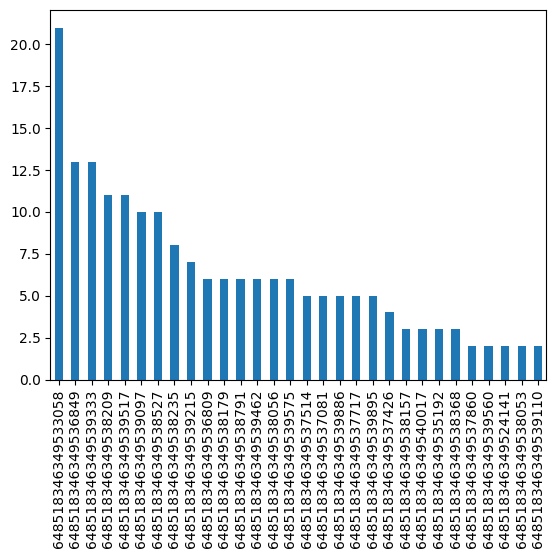

In [24]:
npairs_pre_3rdmost["post_root_id"].value_counts().plot.bar()

## View cell id 648518346349539846 and 648518346349533058 in [neuroglancer](https://neuromancer-seung-import.appspot.com/#!%7B%22layers%22:%5B%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v0/son_of_alignment_v15_rechunked%22%2C%22type%22:%22image%22%2C%22blend%22:%22default%22%2C%22shaderControls%22:%7B%7D%2C%22name%22:%22EM%22%7D%2C%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v185/seg%22%2C%22type%22:%22segmentation%22%2C%22selectedAlpha%22:0.51%2C%22segments%22:%5B%22648518346349533058%22%2C%22648518346349539846%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22cell_segmentation_v185%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-clefts/mip1_d2_1175k%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22synapses%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-mito/seg_191220%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22mitochondria%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-nuclei/seg%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22nuclei%22%7D%5D%2C%22navigation%22:%7B%22pose%22:%7B%22position%22:%7B%22voxelSize%22:%5B4%2C4%2C40%5D%2C%22voxelCoordinates%22:%5B77395.2265625%2C56010.96875%2C-13.424509048461914%5D%7D%7D%2C%22zoomFactor%22:383.0066650796121%7D%2C%22perspectiveOrientation%22:%5B-0.00825042650103569%2C0.06130112707614899%2C-0.0012821174459531903%2C0.9980843663215637%5D%2C%22perspectiveZoom%22:1898.5838201179674%2C%22showSlices%22:false%2C%22selectedLayer%22:%7B%22layer%22:%22cell_segmentation_v185%22%2C%22visible%22:true%7D%2C%22layout%22:%7B%22type%22:%223d%22%2C%22orthographicProjection%22:true%7D%7D)

In [25]:
# are there any autapses? No, there aren't any.

npairs_autapse_checker = npairs_pre_3rdmost["post_root_id"] == 648518346349539846
npairs_pre_3rdmost_selfdf = npairs_pre_3rdmost.loc[npairs_autapse_checker, ["id", "ctr_pos_x_vx", "ctr_pos_y_vx", "ctr_pos_z_vx"]]
npairs_pre_3rdmost_selfdf

,id,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx


# Fourth highest number of reciprocal pairs

In [26]:
npairs_pre_4thmost = npairs[npairs["pre_root_id"] == 648518346349538179]
npairs_pre_4thmost.sort_values("post_root_id")

,id,pre_root_id,post_root_id,cleft_vx,ctr_pt_x_nm,ctr_pt_y_nm,ctr_pt_z_nm,pre_pos_x_vx,pre_pos_y_vx,pre_pos_z_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,post_pos_x_vx,post_pos_y_vx,post_pos_z_vx,pre_cell_type,pre_cell_subtype,post_cell_type,post_cell_subtype
97,2706447,648518346349538179,648518346349515986,1064,257488,221928,51680,64302,55392,1298,64372,55482,1292,64244,55458,1298,inhibitory,martinotti,inhibitory,bipolar
103,2706447,648518346349538179,648518346349515986,1064,257488,221928,51680,64302,55392,1298,64372,55482,1292,64244,55458,1298,inhibitory,martinotti,inhibitory,bipolar
102,2706447,648518346349538179,648518346349515986,1064,257488,221928,51680,64302,55392,1298,64372,55482,1292,64244,55458,1298,inhibitory,martinotti,inhibitory,bipolar
101,2706447,648518346349538179,648518346349515986,1064,257488,221928,51680,64302,55392,1298,64372,55482,1292,64244,55458,1298,inhibitory,martinotti,inhibitory,bipolar
100,2706447,648518346349538179,648518346349515986,1064,257488,221928,51680,64302,55392,1298,64372,55482,1292,64244,55458,1298,inhibitory,martinotti,inhibitory,bipolar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2246129,648518346349538179,648518346349539846,451,241744,149840,67640,60400,37472,1691,60436,37460,1691,60448,37408,1690,inhibitory,martinotti,inhibitory,basket
75,2246129,648518346349538179,648518346349539846,451,241744,149840,67640,60400,37472,1691,60436,37460,1691,60448,37408,1690,inhibitory,martinotti,inhibitory,basket
74,2246129,648518346349538179,648518346349539846,451,241744,149840,67640,60400,37472,1691,60436,37460,1691,60448,37408,1690,inhibitory,martinotti,inhibitory,basket
73,2246129,648518346349538179,648518346349539846,451,241744,149840,67640,60400,37472,1691,60436,37460,1691,60448,37408,1690,inhibitory,martinotti,inhibitory,basket


In [27]:
# This cell id is an inhibitory martinotti neuron

npairs_pre_4thmost["pre_cell_subtype"].iloc[0]

'martinotti'

In [28]:
# This martinotti neuron makes 117 reciprocal synapses 
len(npairs_pre_4thmost)

117

In [29]:
npairs_pre_4thmost["post_root_id"].value_counts()

648518346349515986    10
648518346349537385     9
648518346349536679     8
648518346349537860     7
648518346349539575     7
648518346349539846     6
648518346349538787     6
648518346349539462     5
648518346349538157     5
648518346349537081     4
648518346349538015     4
648518346349537716     4
648518346349537400     4
648518346349537426     3
648518346349539727     3
648518346349537487     3
648518346349537514     3
648518346349538209     3
648518346349539840     3
648518346349537818     3
648518346349519354     3
648518346349523975     3
648518346349533227     3
648518346349538291     2
648518346349538188     2
648518346349539068     2
648518346349539594     2
Name: post_root_id, dtype: int64

In [30]:
# These 117 reciprocal synapses are with 27 other neurons in the volume

len(npairs_pre_4thmost["post_root_id"].value_counts())

27

<AxesSubplot:>

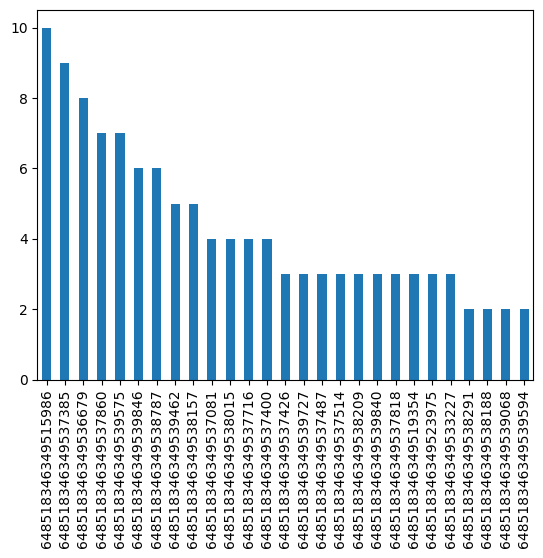

In [31]:
npairs_pre_4thmost["post_root_id"].value_counts().plot.bar()

In [32]:
# are there any autapses? No, there aren't any.

npairs_autapse_checker = npairs_pre_4thmost["post_root_id"] == 648518346349538179
npairs_pre_4thmost_selfdf = npairs_pre_4thmost.loc[npairs_autapse_checker, ["id", "ctr_pos_x_vx", "ctr_pos_y_vx", "ctr_pos_z_vx"]]
npairs_pre_4thmost_selfdf

,id,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx


# Fifth highest number of reciprocal pairs

In [33]:
npairs_pre_5thmost = npairs[npairs["pre_root_id"] == 648518346349538791]
npairs_pre_5thmost.sort_values("post_root_id")

,id,pre_root_id,post_root_id,cleft_vx,ctr_pt_x_nm,ctr_pt_y_nm,ctr_pt_z_nm,pre_pos_x_vx,pre_pos_y_vx,pre_pos_z_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,post_pos_x_vx,post_pos_y_vx,post_pos_z_vx,pre_cell_type,pre_cell_subtype,post_cell_type,post_cell_subtype
70,2235704,648518346349538791,648518346349528994,444,349608,230056,42080,87440,57564,1048,87402,57514,1052,87500,57476,1048,inhibitory,basket,inhibitory,basket
61,2235704,648518346349538791,648518346349528994,444,349608,230056,42080,87440,57564,1048,87402,57514,1052,87500,57476,1048,inhibitory,basket,inhibitory,basket
788,2699541,648518346349538791,648518346349533482,1049,242392,210152,28240,60498,52524,709,60598,52538,706,60500,52622,709,inhibitory,basket,pyramidal,pyramidal cell
447,2965610,648518346349538791,648518346349533482,109,237140,204652,26480,59250,51146,666,59285,51163,662,59182,51216,665,inhibitory,basket,pyramidal,pyramidal cell
146,109904,648518346349538791,648518346349533482,690,244464,208084,25440,61124,52010,643,61116,52021,636,61022,52006,643,inhibitory,basket,pyramidal,pyramidal cell
787,617682,648518346349538791,648518346349533482,712,242492,204380,25360,60470,51060,639,60623,51095,634,60418,51144,637,inhibitory,basket,pyramidal,pyramidal cell
180,638136,648518346349538791,648518346349533482,277,236120,197672,5960,58948,49386,144,59030,49418,149,59040,49368,144,inhibitory,basket,pyramidal,pyramidal cell
221,109904,648518346349538791,648518346349533482,690,244464,208084,25440,61124,52010,643,61116,52021,636,61022,52006,643,inhibitory,basket,pyramidal,pyramidal cell
177,574812,648518346349538791,648518346349535363,360,238460,204628,27120,59540,51128,679,59615,51157,678,59554,51218,679,inhibitory,basket,pyramidal,pyramidal cell
250,574812,648518346349538791,648518346349535363,360,238460,204628,27120,59540,51128,679,59615,51157,678,59554,51218,679,inhibitory,basket,pyramidal,pyramidal cell


In [34]:
# This cell id is an inhibitory basket neuron

npairs_pre_5thmost["pre_cell_subtype"].iloc[0]

'basket'

In [35]:
# This basket neuron makes 39 reciprocal synapses 
len(npairs_pre_5thmost)

39

In [36]:
# These 39 reciprocal synapses are with 9 other neurons in the volume

len(npairs_pre_5thmost["post_root_id"].value_counts())

9

In [37]:
npairs_pre_5thmost["post_root_id"].value_counts()

648518346349538368    10
648518346349539846     6
648518346349539215     6
648518346349533482     6
648518346349539806     3
648518346349528994     2
648518346349535363     2
648518346349538387     2
648518346349539524     2
Name: post_root_id, dtype: int64

<AxesSubplot:>

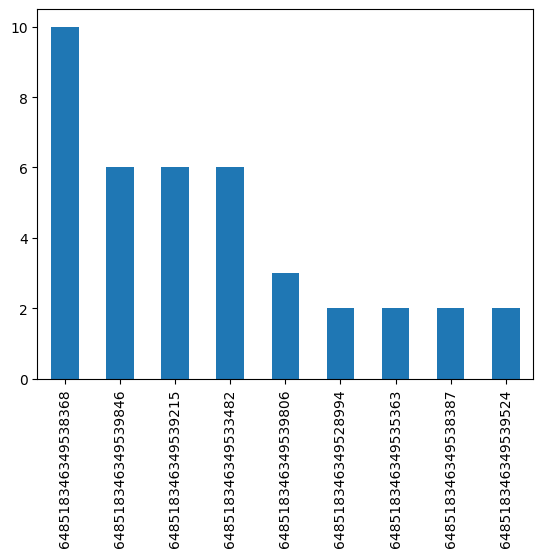

In [38]:
npairs_pre_5thmost["post_root_id"].value_counts().plot.bar()

In [39]:
# are there any autapses? No, there aren't any.

npairs_autapse_checker = npairs_pre_5thmost["post_root_id"] == 648518346349538791
npairs_pre_5thmost_selfdf = npairs_pre_5thmost.loc[npairs_autapse_checker, ["id", "ctr_pos_x_vx", "ctr_pos_y_vx", "ctr_pos_z_vx"]]
npairs_pre_5thmost_selfdf

,id,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx


## What is the largest synapse by voxel size in the reciprocal pairs?

In [40]:
cleft_vx = npairs.sort_values(by="cleft_vx", ascending=False)
cleft_vx

,id,pre_root_id,post_root_id,cleft_vx,ctr_pt_x_nm,ctr_pt_y_nm,ctr_pt_z_nm,pre_pos_x_vx,pre_pos_y_vx,pre_pos_z_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,post_pos_x_vx,post_pos_y_vx,post_pos_z_vx,pre_cell_type,pre_cell_subtype,post_cell_type,post_cell_subtype
1754,2813867,648518346349537400,648518346349538179,1820,230640,284000,66280,57576,71072,1648,57660,71000,1657,57552,70982,1648,pyramidal,pyramidal cell,inhibitory,martinotti
1783,2812744,648518346349538440,648518346349539471,1800,357488,270472,59720,89390,67552,1493,89372,67618,1493,89304,67592,1493,pyramidal,pyramidal cell,pyramidal,pyramidal cell
1900,2812744,648518346349538440,648518346349539471,1800,357488,270472,59720,89390,67552,1493,89372,67618,1493,89304,67592,1493,pyramidal,pyramidal cell,pyramidal,pyramidal cell
1880,3173337,648518346349540017,648518346349537081,1635,263128,184728,67520,65674,46198,1701,65782,46182,1688,65730,46224,1701,pyramidal,pyramidal cell,pyramidal,pyramidal cell
1903,3173337,648518346349540017,648518346349537081,1635,263128,184728,67520,65674,46198,1701,65782,46182,1688,65730,46224,1701,pyramidal,pyramidal cell,pyramidal,pyramidal cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,3096153,648518346349539846,648518346349539462,50,227524,218800,64880,56848,54734,1623,56881,54700,1622,56924,54704,1622,inhibitory,basket,pyramidal,pyramidal cell
328,3389767,648518346349538791,648518346349538368,50,234840,219704,46960,58612,54960,1175,58710,54926,1174,58706,54898,1175,inhibitory,basket,pyramidal,pyramidal cell
606,3096153,648518346349539846,648518346349539462,50,227524,218800,64880,56848,54734,1623,56881,54700,1622,56924,54704,1622,inhibitory,basket,pyramidal,pyramidal cell
285,3096153,648518346349539846,648518346349539462,50,227524,218800,64880,56848,54734,1623,56881,54700,1622,56924,54704,1622,inhibitory,basket,pyramidal,pyramidal cell


In [41]:
cleft_vx.iloc[0]

id                              2813867
pre_root_id          648518346349537400
post_root_id         648518346349538179
cleft_vx                           1820
ctr_pt_x_nm                      230640
ctr_pt_y_nm                      284000
ctr_pt_z_nm                       66280
pre_pos_x_vx                      57576
pre_pos_y_vx                      71072
pre_pos_z_vx                       1648
ctr_pos_x_vx                      57660
ctr_pos_y_vx                      71000
ctr_pos_z_vx                       1657
post_pos_x_vx                     57552
post_pos_y_vx                     70982
post_pos_z_vx                      1648
pre_cell_type                 pyramidal
pre_cell_subtype         pyramidal cell
post_cell_type               inhibitory
post_cell_subtype            martinotti
Name: 1754, dtype: object

# View in [neuroglancer](https://neuromancer-seung-import.appspot.com/#!%7B%22layers%22:%5B%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v0/son_of_alignment_v15_rechunked%22%2C%22type%22:%22image%22%2C%22blend%22:%22default%22%2C%22shaderControls%22:%7B%7D%2C%22name%22:%22EM%22%7D%2C%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v185/seg%22%2C%22type%22:%22segmentation%22%2C%22selectedAlpha%22:0.51%2C%22objectAlpha%22:0.99%2C%22segments%22:%5B%22648518346349537400%22%2C%22648518346349538179%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22cell_segmentation_v185%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-clefts/mip1_d2_1175k%22%2C%22type%22:%22segmentation%22%2C%22segmentColors%22:%7B%221284303%22:%22#abff0f%22%7D%2C%22segments%22:%5B%221284303%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22synapses%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-mito/seg_191220%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22mitochondria%22%2C%22visible%22:false%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-nuclei/seg%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22nuclei%22%7D%5D%2C%22navigation%22:%7B%22pose%22:%7B%22position%22:%7B%22voxelSize%22:%5B4%2C4%2C40%5D%2C%22voxelCoordinates%22:%5B57660%2C71000%2C1657%5D%7D%7D%2C%22zoomFactor%22:5.984479141868939%7D%2C%22perspectiveOrientation%22:%5B0.3935195505619049%2C-0.1184169352054596%2C-0.045770950615406036%2C0.9105079770088196%5D%2C%22perspectiveZoom%22:59.33074437868648%2C%22showSlices%22:false%2C%22selectedLayer%22:%7B%22layer%22:%22cell_segmentation_v185%22%2C%22visible%22:true%7D%2C%22layout%22:%7B%22type%22:%22xy-3d%22%2C%22orthographicProjection%22:true%7D%7D)